In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
# Goal: develop toy model of how EMOD is evolving cytokines

In [3]:
dt1 = 3
dt2 = 12

- SusceptibilityMalaria(dt):
    - cytokines:

In [34]:
def stimulate_cytokines(dt, inv_uL_blood):
    return ( 1 - m_antibody_concentration ) * float(m_antigen_count) * inv_uL_blood;

def basic_sigmoid(threshold, variable):
    if variable < 0:
        return 0
    else:
        return variable/(threshold + variable)

def susceptibility_malaria_cytokines(dt, m_cytokines_start=0.2):
    m_cytokines = m_cytokines_start
    # m_cytokines -= m_cytokines*dt/0.5
    m_cytokines -= m_cytokines*np.exp(-dt/0.5)
    if m_cytokines < 0:
        m_cytokines = 0
        
    temp_cytokine_stimulation = 0
    
    # updateImmunityMSP(dt, temp_cytokine_stimulation)
    # decay antibody
    # temp_cytokine_stimulation += StimulateCytokines NOTE: STIMULATE_CYTOKINES DOES NOT HAVE DT
    # update antibody capacities and concentrations
    
    # updateImmunityPfEMP1Minor(dt)
    # decay antibodies, update capacity, update concentration, update parasite density
    
    # updateImmunityPfEMP1Major(dt)
    # decay antibodies, update capacity, update concentration
    # stimulatecytokines: NOTE: STIMULATE_CYTOKINES DOES NOT HAVE DT.  
    #  --> changes m_cytokine_stimulation += ( 1 - m_antibody_concentration ) * float(m_antigen_count)

    
    # dummy variables:
    temp_cytokine_stimulation = 16000
    m_cytokine_stimulation = 50000
    m_antibody_concentration = 0.8
    m_antigen_count = 8e10
    
    
    # // inflammatory immune response--Stevenson, M. M. and E. M. Riley (2004). "Innate immunity to malaria." Nat Rev Immunol 4(3): 169-180.
    # // now let cytokine be increased in response to IRBCs and ruptured schizonts, if any
    # // pyrogenic threshold similar to previous models--(Molineaux, Diebner et al. 2001; Paget-McNicol, Gatton et al. 2002; Maire, Smith et al. 2006)
    CYTOKINE_STIMULATION_SCALE = 1
    m_ind_pyrogenic_threshold = 15000.0
    m_cytokines += CYTOKINE_STIMULATION_SCALE * basic_sigmoid(m_ind_pyrogenic_threshold, m_cytokine_stimulation) * np.exp(-dt/0.5) #12-hour time constant
    m_cytokines += CYTOKINE_STIMULATION_SCALE * basic_sigmoid(m_ind_pyrogenic_threshold, temp_cytokine_stimulation) # one time spike for rupturing schizonts
    m_cytokine_stimulation = 0 # and reset for next time step
    
    return m_cytokines
    

In [35]:
import numpy as np
import matplotlib.pyplot as plt

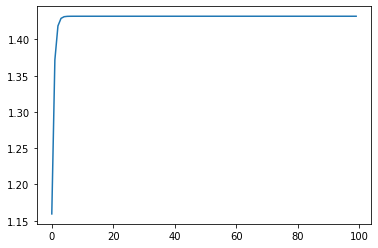

In [36]:
# define some starting variables
# dt = 1/2
dt = 1/8

n_timesteps = 100
x_array = np.zeros(n_timesteps)
for i in np.arange(100):
    if i == 0:
        x_array[i] = susceptibility_malaria_cytokines(dt)
    else:
        x_array[i] = susceptibility_malaria_cytokines(dt, m_cytokines_start=x_array[i-1])
    
plt.plot(x_array)

In [37]:
def evolve(dt, n_timesteps=100):
    t_array = np.zeros(n_timesteps)
    x_array = np.zeros(n_timesteps)
    for i in np.arange(100):
        t_array[i] = dt*i
        if i == 0:
            x_array[i] = susceptibility_malaria_cytokines(dt)
        else:
            x_array[i] = susceptibility_malaria_cytokines(dt, m_cytokines_start=x_array[i-1])
    
    # plt.plot(t_array, x_array)
    return t_array, x_array

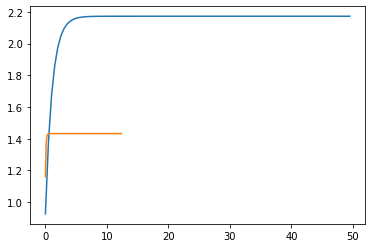

In [38]:
a,b=evolve(dt=1/2)
plt.plot(a,b)

c,d = evolve(dt=1/8)
plt.plot(c,d)

In [ ]:
def test_simple(dt):
    